In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns

In [2]:
df = pd.read_csv("Practice dataset 1 KNN regression Hydropower_Consumption.csv")

In [3]:
df

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,312,498,555,63,565,59,637,748,542,...,751,595,71,804,895,989,1025,105,105,107
1,Africa,75246,80864,85181,82873,87405,89066,92241,95341,97157,...,107427,110445,110952,117673,123727,115801,123816,130388,132735,0
2,Albania,4548,3519,3477,5117,5411,5319,4951,276,3759,...,7673,4036,4725,6959,4726,5866,7136,448,448,4018
3,Algeria,54,69,57,265,251,555,218,226,283,...,173,378,389,99,193,145,72,56,117,152
4,Angola,903,1007,1132,1229,1733,2197,2638,2472,3103,...,3666,3967,3734,4719,4991,5037,5757,7576,7576,8422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Uzbekistan,5879,6017,6186,7155,6493,6876,585,6457,4386,...,8192,5721,6355,627,6185,602,7327,8427,5897,65
149,Venezuela,62886,60441,59534,60532,70075,77088,81413,83034,86713,...,7666,83155,81736,83405,78747,73397,61699,59296,56987,63267
150,Vietnam,14551,1821,18198,0,17818,16535,0,22437,25984,...,28524,41076,53305,5782,62165,57171,66048,88762,84485,65563
151,Zambia,7673,7814,8021,8174,8375,8794,9572,9535,9427,...,10331,11368,12227,13148,13902,12907,10915,12076,12076,11799


In [4]:
df.shape

(153, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  153 non-null    object
 1   2000     153 non-null    int64 
 2   2001     153 non-null    int64 
 3   2002     153 non-null    int64 
 4   2003     153 non-null    int64 
 5   2004     153 non-null    int64 
 6   2005     153 non-null    int64 
 7   2006     153 non-null    int64 
 8   2007     153 non-null    int64 
 9   2008     153 non-null    int64 
 10  2009     153 non-null    int64 
 11  2010     153 non-null    int64 
 12  2011     153 non-null    int64 
 13  2012     153 non-null    int64 
 14  2013     153 non-null    int64 
 15  2014     153 non-null    int64 
 16  2015     153 non-null    int64 
 17  2016     153 non-null    int64 
 18  2017     153 non-null    int64 
 19  2018     153 non-null    int64 
 20  2019     153 non-null    int64 
dtypes: int64(20), object(1)
memory usage: 2

In [6]:
df.isna().sum()

Country    0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
dtype: int64

In [7]:
df.columns

Index(['Country', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019'],
      dtype='object')

In [8]:
X = df.drop(columns = ['2019', 'Country'])
y = df['2019']

In [9]:
X = pd.get_dummies(X, drop_first=True)

In [10]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

In [12]:
params = {
    'n_neighbors':[3,5,7,12],
    'weights' : ['uniform', 'distance'],
    'metric':['minkowski','manhattan','euclidean']
}

In [13]:
dia_reg = GridSearchCV(KNeighborsRegressor(), params, cv = 10)

In [14]:
dia_reg.fit(X_train, y_train)

c:\Users\Neil\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Neil\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Neil\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Neil\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Neil\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [3, 5, 7, 12],
                         'weights': ['uniform', 'distance']})

In [ ]:
dia_reg.best_score_

-0.7084955694221238

In [16]:
dia_reg.best_params_

{'metric': 'minkowski', 'n_neighbors': 12, 'weights': 'uniform'}

In [17]:
regressor = KNeighborsRegressor(metric = 'manhattan', n_neighbors= 5, weights='distance')
regressor.fit(X_train, y_train)

KNeighborsRegressor(metric='manhattan', weights='distance')

In [18]:
y_pred = regressor.predict(X_val)


In [19]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse

3884.94001975831

In [20]:
from sklearn.metrics import mean_squared_error
# Calculate and display Mean Squared Error (MSE)
mse = mean_squared_error(y_val, y_pred)
print("MSE value : {:.4f}".format(mse))
from sklearn.metrics import mean_squared_error
# Calculate and display Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print("RMSE value : {:.4f}".format(rmse))

from sklearn.metrics import r2_score
# Calculate and display R2 score (R2)
print("R2 score value : {:.4f}".format(r2_score(y_val, y_pred)))

from sklearn.metrics import mean_absolute_error
# Calculate and display Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, y_pred)
print("MAE value : {:.4f}".format(mae))

MSE value : 15092758.9571
RMSE value : 3884.9400
R2 score value : 0.8700
MAE value : 1572.8438


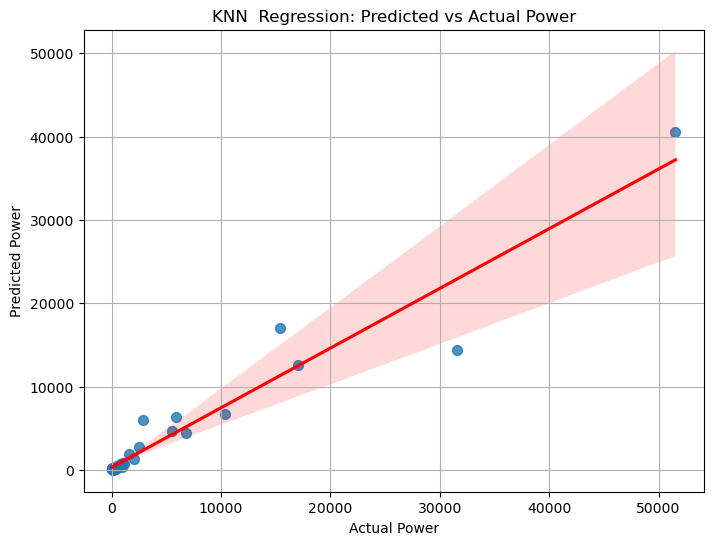

In [21]:
plt.figure(figsize=(8,6))
sns.regplot(x=y_val, y=y_pred, scatter_kws={"s":50}, line_kws={"color": "red"})
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.title("KNN  Regression: Predicted vs Actual Power")
plt.grid(True)
plt.show()